# **Workforce_Attrition_Prediction** 

### The dataset is about employee attrition. This analysis can discover if any particular factors or patterns that lead to attrition. If so, employers can take certain precausion to prevent attrition which in employer of view, employee attrition is a loss to company, in both monetary and non-monetary. 

### **Import packages**

In [1]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### **Import data**

In [2]:
#Import Employee Attrition data
data=pd.read_csv('Workforce_attrition_dataset.csv')

### **Check and remediate if there are any null values**

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**COMMENT:** Above output shows that there are No Null values.

### **Check and remove if there are any fields which does not add value**

In [5]:
data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

**COMMENT:** From the above output ALL the employees are above 18, so this field does not add any value.

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**COMMENT:** Standard deviation(std) for the fields "EmployeeCount" and ."StandardHours" are ZERO.  Hence these fields does not add value, hence they can be removed.

In [ ]:
#These fields does not add value, hence removed
data = data.drop(['EmployeeCount','Over18','DailyRate','HourlyRate','MonthlyRate','StandardHours'], axis = 1)

In [8]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


### **Convert Categorical values to Numeric Values**

#### **Perform datatype conversion or translation wherever required**

"Attrition" field has values **Yes/No**, however for machin learning algorithms we need numeric values.
Hence translating **Yes/No** to binary **1/0**

In [9]:
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
# 0:No, 1: Yes
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [10]:
# Ensure column is string type and strip any spaces
data['BusinessTravel'] = data['BusinessTravel'].astype(str).str.strip()

# Convert categorical variable BusinessTravel to numerical values
# 0: Non-Travel, 1: Travel_Frequently, 2: Travel_Rarely
data['BusinessTravel'] = data['BusinessTravel'].apply(
    lambda x: 1 if x == 'Travel_Frequently' else (2 if x == 'Travel_Rarely' else 0)
)


In [11]:
# Convert categorical variables Department to numerical values
# 0: Sales, 1: Research & Development, 2: Human Resources
data['Department'] = data['Department'].apply(
    lambda x: 0 if x == 'Sales' else (1 if x == 'Research & Development' else 2)
)

In [12]:
# Convert categorical variables EducationField to numerical values
# 0: Life Sciences, 1: Medical, 2: Marketing, 3: Technical Degree, 4: Human Resources
data['EducationField'] = data['EducationField'].apply(
    lambda x: 0 if x == 'Life Sciences' else (1 if x == 'Medical' else (2 if x == 'Marketing' else (3 if x == 'Technical Degree' else 4)))
)

In [13]:
# Convert categorical values of Gender to numerical values
# 0: Male, 1: Female
data['Gender'] = data['Gender'].apply(
    lambda x: 0 if x == "Male" else 1
)

In [14]:
# Convert categorical variables JobRole to numerical values
# 0: Sales Executive, 1: Research Scientist, 2: Laboratory Technician, 3: Manufacturing Director, 4: Healthcare Representative, 5: Manager, 6: Sales Representative, 7: Research Director
# 8: Human Resources
data['JobRole']=data['JobRole'].apply(lambda x : 0 if x=='Sales Executive' else (1 if x=='Research Scientist' else (2 if x=='Laboratory Technician' else (3 if x=='Manufacturing Director' else (4 if x=='Healthcare Representative' else (5 if x=='Manager' else (6 if x=='Sales Representative' else (7 if x=='Research Director' else 8))))))))

In [15]:
# Convert categorical variables MaritalStatus to numerical values
# 0: Single, 1: Married, 2: Divorced
data['MaritalStatus']=data['MaritalStatus'].apply(lambda x : 0 if x=='Single' else (1 if x=='Married' else 2))

In [16]:
# Convert categorical variables OverTime to numerical values
# 0: No, 1: Yes
data['OverTime']=data['OverTime'].apply(lambda x : 0 if x=='No' else 1)

In [17]:
#This function is used to convert Categorical values to Numerical values
# data=pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

In [18]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,0,1,2,0,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,1,7,1,...,4,80,1,6,3,3,2,2,2,2


**COMMENT:** It can be seen from the difference in the output of **data.head()** before and after the coversion that now **ALL the fields have numerical values.**

### **General preprocessing of data**

##### **Separating the Feature and Target Matrices**

In [19]:
#Separating Feature and Target matrices
X = data.drop(['Attrition'], axis=1)
y=data['Attrition']

##### **Scaling the data values to standardize the range of independent variables**

In [20]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

##### **Split the data into Training set and Testing set**

In [21]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

### **Function definition**

#### These functions will be used to prepare machine learning models

In [22]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [23]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### **PERFORM PREDICTIONS USING DIFFERENT MACHINE LEARNING ALGORITHMS**

#### These predictions are done for the purpose of deciding which ML model has to be used

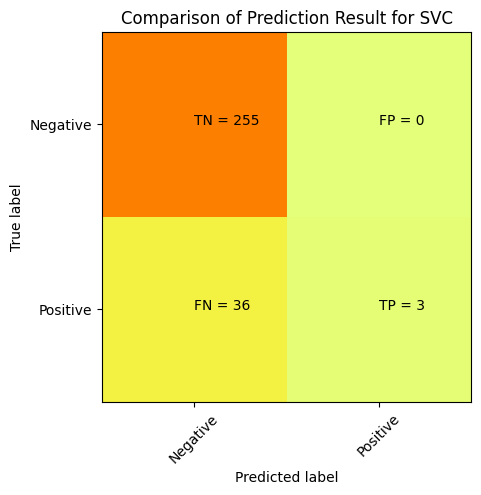

Accuracy of the Model SVC 87.8%


In [24]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

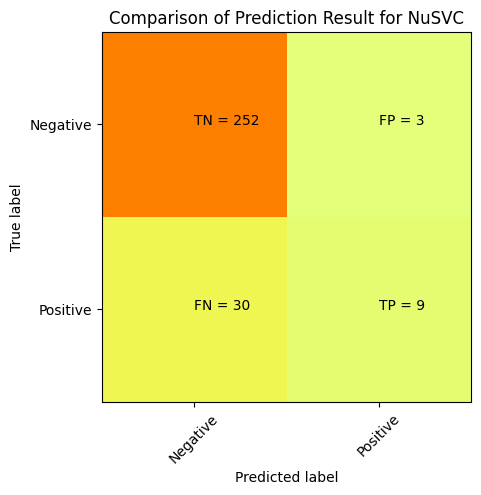

Accuracy of the Model NuSVC 88.8%


In [25]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "NuSVC"
model=NuSVC(nu=0.285)#Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

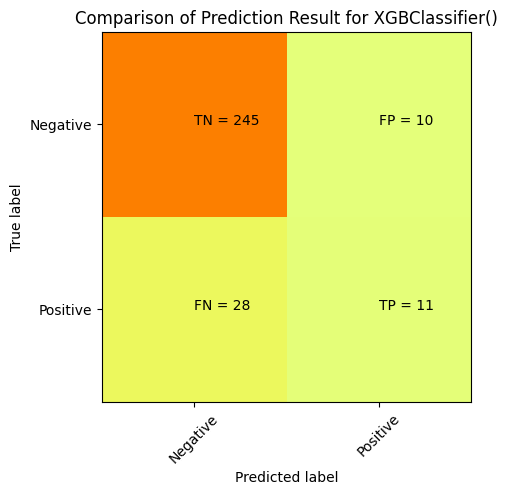

Accuracy of the Model XGBClassifier() 87.1%


In [26]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

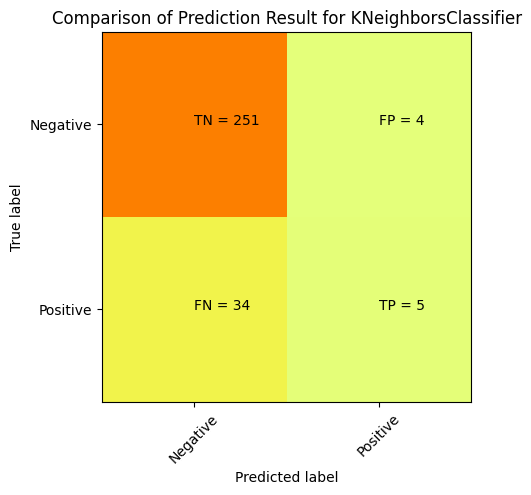

Accuracy of the Model KNeighborsClassifier 87.1%


In [27]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

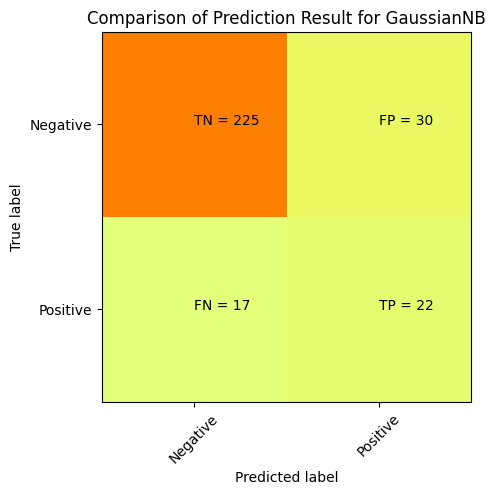

Accuracy of the Model GaussianNB 84.0%


In [28]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

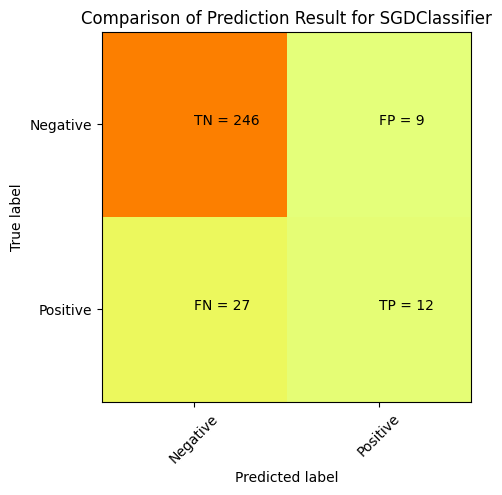

Accuracy of the Model SGDClassifier 87.8%


In [29]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

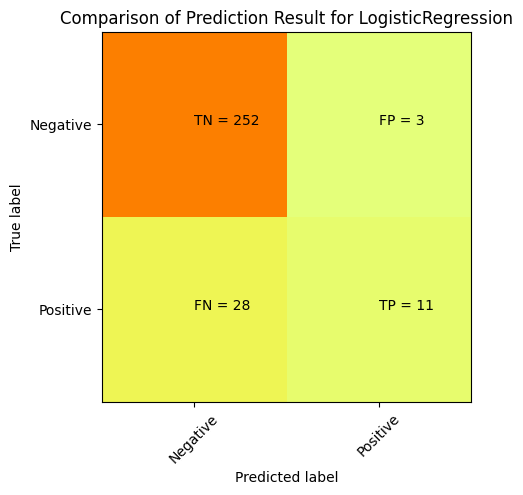

Accuracy of the Model LogisticRegression 89.5%


In [30]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

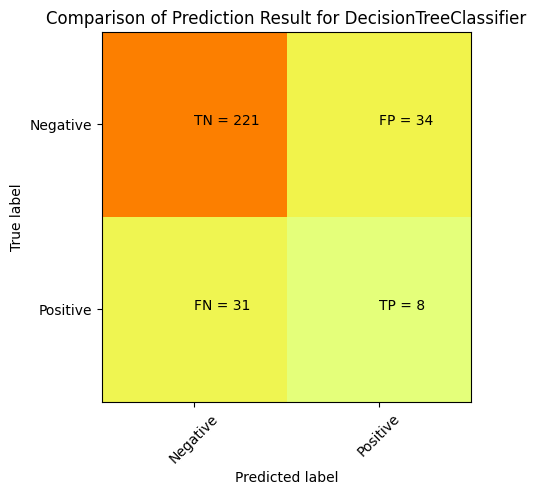

Accuracy of the Model DecisionTreeClassifier 77.9%


In [31]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

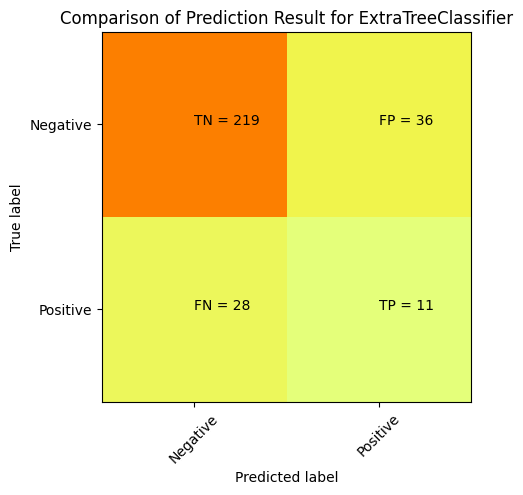

Accuracy of the Model ExtraTreeClassifier 78.2%


In [32]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

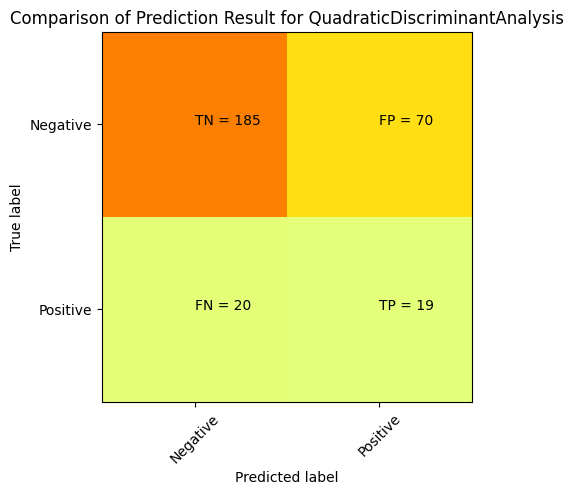

Accuracy of the Model QuadraticDiscriminantAnalysis 69.4%


In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

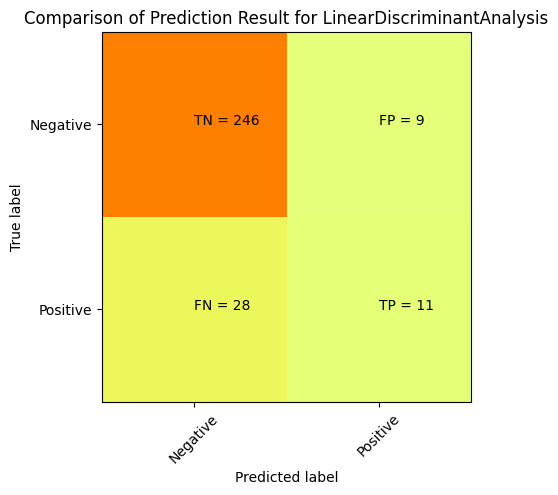

Accuracy of the Model LinearDiscriminantAnalysis 87.4%


In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

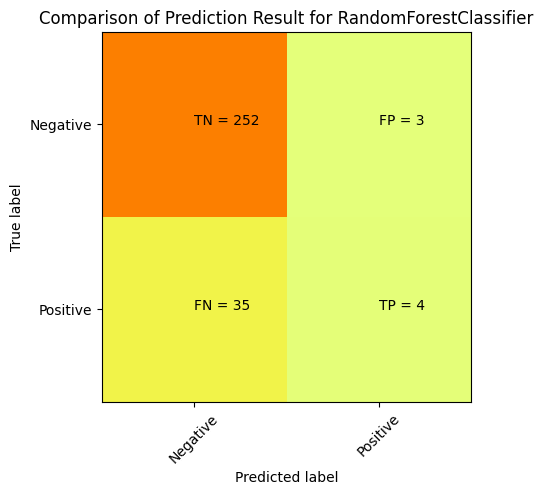

Accuracy of the Model RandomForestClassifier 87.1%


In [35]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

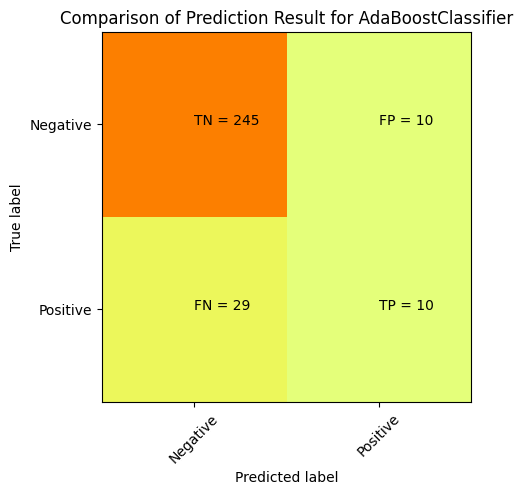

Accuracy of the Model AdaBoostClassifier 86.7%


In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

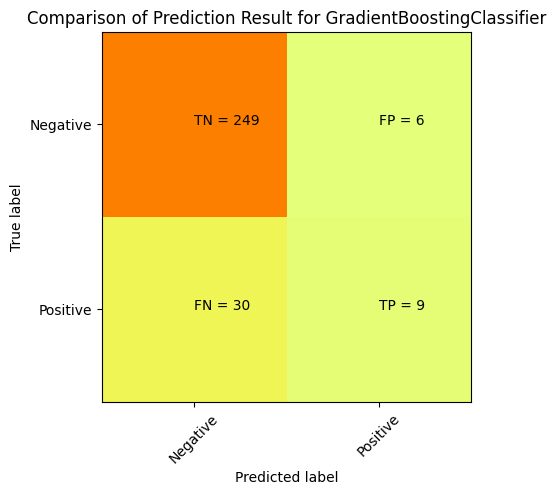

Accuracy of the Model GradientBoostingClassifier 87.8%


In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

## **For Employee Demographics**

#### Preparing data for ML model

In [38]:
#Making data ready for prediction
A = data.drop([
    'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 
    'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate', 
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','EmployeeNumber'], axis=1)
B=data['Attrition']

In [39]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size =0.2,random_state=42)

#### Training the ML model for required data

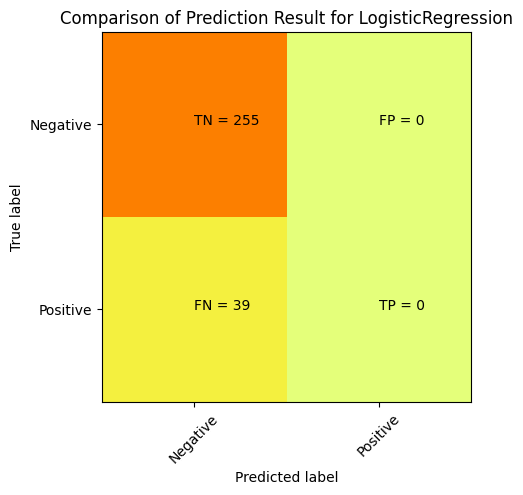

Accuracy of the Model LogisticRegression 86.7%
Predictions on new data: [0]


In [43]:
# Model to be used for prediction LogisticRegression with accuracy 89.5%
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(A_train,B_train,A_test,Model)
# making prediction on new data
new_data = [[36, 0, 1]]  # Data Age	Gender	MaritalStatus
new_predictions = model.predict(new_data)
print("Predictions on new data:", new_predictions)

In [41]:
A

,Age,Gender,MaritalStatus
0,41,1,0
1,49,0,1
2,37,0,0
3,33,1,1
4,27,0,1
...,...,...,...
1465,36,0,1
1466,39,0,1
1467,27,0,1
1468,49,0,1


In [42]:
B

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64